In [15]:
#Faiza's initial cleanup code implemented again
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

filename_read = '/Users/valliramaswamy/Documents/MSci Data Science/Year-3/2IntrotoAI/group3CW/datasets/Clean_Dataset.csv'
df =pd.read_csv(filename_read)

#Sorting values by airline
df = df.sort_values(by='airline', ascending=True)

#Checking for null values in airline
df['airline'].isnull().sum()

#Checking for null values in source city
df['source_city'].isnull().sum()

#Checking for null values in departure time
df['departure_time'].isnull().sum()

#Checking for null values in stops
df['stops'].isnull().sum()

#Checking for null values in arrival_time
df['arrival_time'].isnull().sum()

#Checking for null values in destination city
df['destination_city'].isnull().sum()

#Checking for null values in class
df['class'].isnull().sum()

#Checking for null values in duration
df['duration'].isnull().sum()

#Checking for null values in days left
df['days_left'].isnull().sum()

#Checking for null values in price
df['price'].isnull().sum()

#Checking overall and asking for sum of null values
df.isnull().values.all().sum()

# Dropping Flight column
df.drop('flight', 1, inplace=True)

# Changing price to Pounds
df["price"] = (df["price"]*0.011).round(2)

# Printinf dataset
print(df)

        Unnamed: 0  airline source_city departure_time        stops  \
184894      184894  AirAsia     Chennai          Night          one   
186660      186660  AirAsia     Chennai        Morning  two_or_more   
186659      186659  AirAsia     Chennai        Morning          one   
186658      186658  AirAsia     Chennai        Morning  two_or_more   
186657      186657  AirAsia     Chennai        Morning          one   
...            ...      ...         ...            ...          ...   
211524      211524  Vistara       Delhi        Evening          one   
87243        87243  Vistara   Bangalore        Evening          one   
87244        87244  Vistara   Bangalore        Morning          one   
87482        87482  Vistara   Bangalore        Morning          one   
300152      300152  Vistara     Chennai        Morning          one   

       arrival_time destination_city     class  duration  days_left   price  
184894      Morning            Delhi   Economy     10.92         33  

<ipython-input-15-1e639e18ce84>:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('flight', 1, inplace=True)


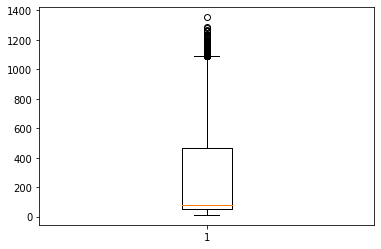

In [16]:
#Valli's code - further cleanup of the data (feature engineering)

plt.boxplot(df['price'])
plt.show()

In [17]:
#creates a new column in the dataframe named 'price outlier'
df['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(df['price'])
print(price_mean)
price_std = np.std(df['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
df.loc[abs(df['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(df['price_outlier']))

df = df[df.price_outlier != 1]
print (df.shape)

229.78609928936243
249.67505500334298
Counter({0: 289222, 1: 10931})
(289222, 12)


In [18]:
#Creating a new column logging the price column to be used in ML models

df['log_price'] = np.log(df['price'])
df

<ipython-input-18-2d6a4f64f272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price'])


,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_outlier,log_price
184894,184894,AirAsia,Chennai,Night,one,Morning,Delhi,Economy,10.92,33,27.25,0,3.305054
186660,186660,AirAsia,Chennai,Morning,two_or_more,Late_Night,Delhi,Economy,16.00,44,27.25,0,3.305054
186659,186659,AirAsia,Chennai,Morning,one,Late_Night,Delhi,Economy,15.17,44,27.25,0,3.305054
186658,186658,AirAsia,Chennai,Morning,two_or_more,Night,Delhi,Economy,13.50,44,27.25,0,3.305054
186657,186657,AirAsia,Chennai,Morning,one,Night,Delhi,Economy,11.67,44,27.25,0,3.305054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211525,211525,Vistara,Delhi,Evening,one,Night,Mumbai,Business,7.33,45,647.64,0,6.473335
211524,211524,Vistara,Delhi,Evening,one,Night,Mumbai,Business,5.83,45,647.64,0,6.473335
87243,87243,Vistara,Bangalore,Evening,one,Late_Night,Delhi,Economy,5.17,18,45.22,0,3.811539
87244,87244,Vistara,Bangalore,Morning,one,Afternoon,Delhi,Economy,5.58,18,45.22,0,3.811539


In [20]:
from pathlib import Path
filepath = Path('/Users/valliramaswamy/Desktop/Clean_Dataset_group3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)